In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data=pd.read_csv("E:/ml/winequalityN.csv")

In [9]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
bins=[2,6,8]
group_names=['bad','good']
data['quality']=pd.cut(data['quality'],bins=bins,labels=group_names)


In [4]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [5]:
data['quality'].replace('bad',0,inplace=True)
data['quality'].replace('good',1,inplace=True)

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [11]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor=x_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

NameError: name 'x_train' is not defined

<Figure size 864x720 with 0 Axes>

In [8]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [9]:
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [10]:
y_pred=classifier.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[285  21]
 [  5   9]]


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.91875

In [13]:
import collections

In [14]:
a=np.array(y_pred)
collections.Counter(a)

Counter({0: 306, 1: 14})

In [15]:
b=np.array(y_test)
collections.Counter(b)

Counter({0: 290, 1: 30})

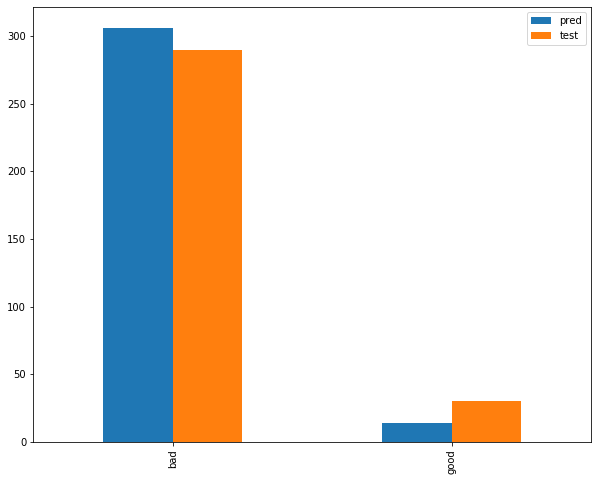

In [16]:
pred=[306,14]
test=[290,30]
index = ['bad','good']
df = pd.DataFrame({'pred': pred,
                   'test': test}, index=index)



df.plot(kind='bar',figsize=(10,8))
